In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

In [2]:
# 성적 데이터 분석
# pandas의 read_excel() 메소드로 엑셀 파일을 읽어와 데이터프레임으로 저장한다.
# !pip install xlrd # 엑셀 파일을 읽을 때 사용하는 모듈
df = pd.read_excel("./data/score.xlsx")
df

반   이름   국어  영어  수학  과학
0   1  성춘향   67  87  90  98
1   1  이몽룡   45  45  56  98
2   1  향단이   95  59  96  88
3   1   방자   65  94  89  98
4   1   월매   45  65  78  98
5   1  변학도   78  76  98  89
6   2  홍길동   87  67  65  56
7   2  임꺽정   89  98  78  78
8   2  전우치  100  78  56  65
9   2  일지매   99  89  87  87
10  2   심청   98  45  56  54
11  2   콩쥐   65  89  87  78

In [3]:
# 액셀 파일에서 읽어들인 데이터가 저장된 데이터프레임에 총점과 평균의 파생(계산에 의한) 변수를
# 추가한다.
subjects = ["국어", "영어", "수학", "과학"]
df["총점"] = df[subjects].sum(axis = 1)
df["평균"] = df[subjects].mean(axis = 1)
df

반   이름   국어  영어  수학  과학   총점     평균
0   1  성춘향   67  87  90  98  342  85.50
1   1  이몽룡   45  45  56  98  244  61.00
2   1  향단이   95  59  96  88  338  84.50
3   1   방자   65  94  89  98  346  86.50
4   1   월매   45  65  78  98  286  71.50
5   1  변학도   78  76  98  89  341  85.25
6   2  홍길동   87  67  65  56  275  68.75
7   2  임꺽정   89  98  78  78  343  85.75
8   2  전우치  100  78  56  65  299  74.75
9   2  일지매   99  89  87  87  362  90.50
10  2   심청   98  45  56  54  253  63.25
11  2   콩쥐   65  89  87  78  319  79.75

In [11]:
df.dtypes

반       int64
이름     object
국어      int64
영어      int64
수학      int64
과학      int64
총점      int64
평균    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   반       12 non-null     int64  
 1   이름      12 non-null     object 
 2   국어      12 non-null     int64  
 3   영어      12 non-null     int64  
 4   수학      12 non-null     int64  
 5   과학      12 non-null     int64  
 6   총점      12 non-null     int64  
 7   평균      12 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 896.0+ bytes


In [4]:
# sort_values() 메소드로 데이터프레임의 특정 열을 기준으로 데이터를 정렬할 수 있다.
# ascending 옵션을 생략하거나 True를 지정하면 오름차순으로 정렬되고 False를 지정하면 내림차순으로
# 정렬된다.
# 정렬에 기준으로 사용할 열이 2개 이상이면 인덱스에 담아서 메소드로 전달하고 전달된 리스트의 0번
# 인덱스로 지정된 값이 같으면 1번 인덱스 값으로 정렬한다.
sorted_df = df.sort_values(["평균"], ascending = False)
sorted_df

반   이름   국어  영어  수학  과학   총점     평균
9   2  일지매   99  89  87  87  362  90.50
3   1   방자   65  94  89  98  346  86.50
7   2  임꺽정   89  98  78  78  343  85.75
0   1  성춘향   67  87  90  98  342  85.50
5   1  변학도   78  76  98  89  341  85.25
2   1  향단이   95  59  96  88  338  84.50
11  2   콩쥐   65  89  87  78  319  79.75
8   2  전우치  100  78  56  65  299  74.75
4   1   월매   45  65  78  98  286  71.50
6   2  홍길동   87  67  65  56  275  68.75
10  2   심청   98  45  56  54  253  63.25
1   1  이몽룡   45  45  56  98  244  61.00

In [5]:
# 평균의 내림차순으로 정렬된 데이터로 막대 그래프를 그린다.
# x축으로 학생 이름이 출력되지 않고 인덱스가 출력되므로 어떤 학생의 그래프인지 알 수 없기 때문에
# 인덱스를 학생 이름으로 변경한 후 그래프를 작성한다.
sorted_df.index = sorted_df["이름"]
sorted_df

반   이름   국어  영어  수학  과학   총점     평균
이름                                      
일지매  2  일지매   99  89  87  87  362  90.50
방자   1   방자   65  94  89  98  346  86.50
임꺽정  2  임꺽정   89  98  78  78  343  85.75
성춘향  1  성춘향   67  87  90  98  342  85.50
변학도  1  변학도   78  76  98  89  341  85.25
향단이  1  향단이   95  59  96  88  338  84.50
콩쥐   2   콩쥐   65  89  87  78  319  79.75
전우치  2  전우치  100  78  56  65  299  74.75
월매   1   월매   45  65  78  98  286  71.50
홍길동  2  홍길동   87  67  65  56  275  68.75
심청   2   심청   98  45  56  54  253  63.25
이몽룡  1  이몽룡   45  45  56  98  244  61.00

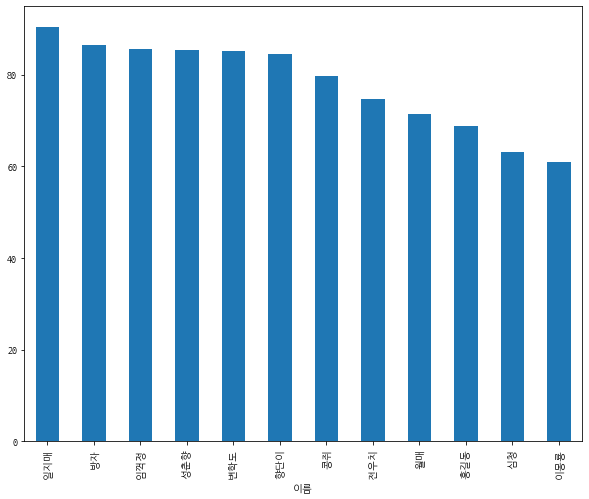

In [10]:
# plot() 메소드로 그래프를 그린다. kind 속성에 bar라고 지정하면 막대 그래프를 그릴수 있고 figsize
# 속성에 리스트나 튜플 형태로 그래프의 크기를 지정할 수 있다.
sorted_df["평균"].plot(kind = "bar", figsize = [10, 8])
# 그래프가 작성되고 난 후 matplotlib 객체의 이름이 출력되므로 show() 메소드를 실행해서 그래프만
# 출력되게 한다.
# plt.show()

1반과 2반의 전체 점수 비교

In [14]:
일반 = df[df["반"] == 1]
일반

반   이름  국어  영어  수학  과학   총점     평균
0  1  성춘향  67  87  90  98  342  85.50
1  1  이몽룡  45  45  56  98  244  61.00
2  1  향단이  95  59  96  88  338  84.50
3  1   방자  65  94  89  98  346  86.50
4  1   월매  45  65  78  98  286  71.50
5  1  변학도  78  76  98  89  341  85.25

In [15]:
이반 = df[df["반"] == 2]
이반

반   이름   국어  영어  수학  과학   총점     평균
6   2  홍길동   87  67  65  56  275  68.75
7   2  임꺽정   89  98  78  78  343  85.75
8   2  전우치  100  78  56  65  299  74.75
9   2  일지매   99  89  87  87  362  90.50
10  2   심청   98  45  56  54  253  63.25
11  2   콩쥐   65  89  87  78  319  79.75

In [17]:
일반평균 = 일반["총점"].sum() / (6 * 4)
print(일반평균)
이반평균 = 이반["총점"].sum() / (6 * 4)
print(이반평균)

79.04166666666667
77.125


In [ ]:
# 1반 평균이 높다.
# 1반 선생님이 매우 좋아합니다. 그걸 보고있던 2반 선생님은 "별 차이도 안나는구먼 뭘~~~~~" 이라고 
# 합니다.
